
# Project:Dataset using TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

## Dataset Description 

### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.The dataset of the movie contains some vital informations which include the id, imdb_id, popularity of the movie, the budget, the revenue, the original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

### It was observed that there were some adjustment in the budget, and revenue which is different from the original plan. This adjustment were indicated as budget_adj, and revenue_adj.



### Question(s) for Analysis

### Given this dataset, there are numerous questions that we can explore. However, we will be focusing on some questions that can be gotten from the data.

### Question 1: Which movie has the highest popularity?
### Question 2: Which movie has generated the highest revenue?
### Question 3: Which movie has the longest runtime?
### Question 4: Which director has directed the highest movies?
### Question 5: Which genres have recoreded the highest?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### EDA	exploring and augmenting data to maximize the potential of analysis, visualizations, and models; for example, engineering new features and removing outliers.
### Wrangling	gathering, assessing, and cleaning 
### In this stage, i will be doing some wragling and EDA. Wrangling and EDA (exploratory data analysis) can be used synonymously because of their purpose which sometimes overlap.


In [2]:
df_tmdb = pd.read_csv('tmdb.csv')

In [3]:
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


 To return the first two of the dataframe

In [4]:
print(df_tmdb.shape)

(10866, 21)


## Data Cleaning

### Now we have gotten the data. The next phrase is for cleaning. We are going to profile each data, check for duplications, means and so on.
### To view the summary of our dataframe

In [5]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### To check our values if the expression is NULL

In [6]:
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df_tmdb.duplicated().sum()

1

### I decided to drop some columns that i will not be using.

In [8]:
df_tmdb.drop(['keywords', 'tagline', 'production_companies', 'homepage'], axis = 1, inplace=True)

### I decided to confirm if my previous code was effective.

In [9]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   cast            10790 non-null  object 
 7   director        10822 non-null  object 
 8   overview        10862 non-null  object 
 9   runtime         10866 non-null  int64  
 10  genres          10843 non-null  object 
 11  release_date    10866 non-null  object 
 12  vote_count      10866 non-null  int64  
 13  vote_average    10866 non-null  float64
 14  release_year    10866 non-null  int64  
 15  budget_adj      10866 non-null  float64
 16  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object

In [10]:
df_tmdb.nunique()

id                10865
imdb_id           10855
popularity        10814
budget              557
revenue            4702
original_title    10571
cast              10719
director           5067
overview          10847
runtime             247
genres             2039
release_date       5909
vote_count         1289
vote_average         72
release_year         56
budget_adj         2614
revenue_adj        4840
dtype: int64

In [11]:
df_tmdb.mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_17148\1443195293.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_tmdb.mean()


id              6.606418e+04
popularity      6.464410e-01
budget          1.462570e+07
revenue         3.982332e+07
runtime         1.020709e+02
vote_count      2.173897e+02
vote_average    5.974922e+00
release_year    2.001323e+03
budget_adj      1.755104e+07
revenue_adj     5.136436e+07
dtype: float64

In [12]:
df_tmdb.fillna(df_tmdb.mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_17148\415576581.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_tmdb.fillna(df_tmdb.mean(), inplace=True)


In [13]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   cast            10790 non-null  object 
 7   director        10822 non-null  object 
 8   overview        10862 non-null  object 
 9   runtime         10866 non-null  int64  
 10  genres          10843 non-null  object 
 11  release_date    10866 non-null  object 
 12  vote_count      10866 non-null  int64  
 13  vote_average    10866 non-null  float64
 14  release_year    10866 non-null  int64  
 15  budget_adj      10866 non-null  float64
 16  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object

In [14]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Exploratory Data Analysis

## After trimming the data provided, i will be exploring the data questions that was asked in the introductory page.

### Question 1: Which movie has the highest popularity?

### grouping the popularity in order to streamline what is required.

In [15]:
df_tmdb.groupby('popularity')

In [16]:
df_tmdb.groupby('popularity').mean().revenue_adj

popularity
0.000065     0.000000e+00
0.000188     0.000000e+00
0.000620     0.000000e+00
0.000973     0.000000e+00
0.001115     0.000000e+00
                 ...     
13.112507    2.716190e+08
14.311205    7.122911e+08
24.949134    5.726906e+08
28.419936    3.481613e+08
32.985763    1.392446e+09
Name: revenue_adj, Length: 10814, dtype: float64

### Getting the movie with the highest population in respect to the original_title.


### I will be exploring the first five(5) popular movies.

In [17]:
df_popularity = df_tmdb.sort_values(by='popularity', ascending=False)
df_popularity = df_popularity[['original_title', 'popularity']].head(5)
df_popularity

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507


In [18]:
df_popularity.describe()

,popularity
count,5.000000
mean,22.755709
std,8.744278
min,13.112507
25%,14.311205
50%,24.949134
75%,28.419936
max,32.985763


Text(0.5, 1.0, 'highest population in respect to the original_title')

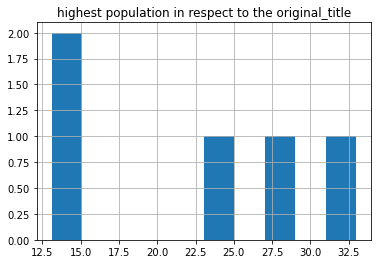

In [19]:
df_popularity.hist()
plt.title('highest population in respect to the original_title')

Having explorig the movie with the highest population, from the graph, we can deduced that the highest movie is the Jurassic World with the populatio of 32.985763, followed by Mad Max: Fury Road with 28.419936. This graphy is based on their original title.

### Question 2: Which movie has generated the highest revenue

In [20]:
#Next question is based on the first five(5) higest revenue.

df_revenue = df_tmdb.sort_values(by='revenue', ascending=False)
df_revenue = df_revenue[['original_title', 'revenue']].head(5)
df_revenue

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810


Text(0.5, 1.0, 'Graph showing the highest revenue')

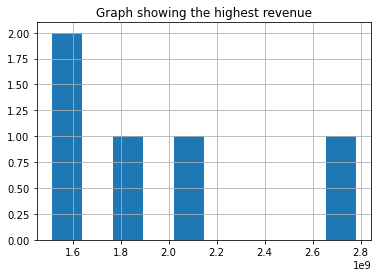

In [21]:
df_revenue.hist()
plt.title('Graph showing the highest revenue')

The graph above shows that Avatar generated the highest revenuw with 2781505847, followed by star wars.

### Question 3: Which movie has the longest runtime?

In [22]:
df_runtime = df_tmdb.sort_values(by='runtime', ascending=False)
df_runtime = df_runtime[['revenue', 'runtime']].head(5)
df_runtime

,revenue,runtime
3894,0,900
4041,0,877
2722,125000000,705
6176,0,566
6181,0,561


[Text(0.5, 1.0, 'Relationship between Runtime and Revenue')]

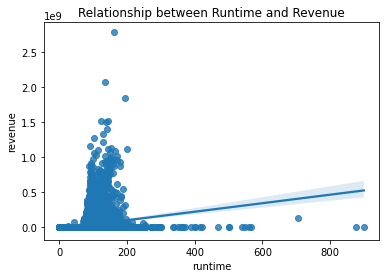

In [23]:
sns.regplot(x=df_tmdb['runtime'],y=df_tmdb['revenue']).set(title='Relationship between Runtime and Revenue')

This graph shows the relationship between Revenue and Runtime showing 900 as the highest runtime in respect to the revenue.

### Question 4: Which director has directed the highest movies?

In [24]:
df_tmdb.director.value_counts()[:7]

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Name: director, dtype: int64

Text(0.5, 1.0, 'Graph showing the highest director')

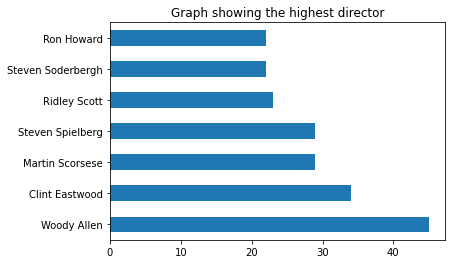

In [39]:
def function(arg1, arg2):
    df_tmdb[arg1].value_counts()[:7].plot(kind=arg2)
function('director', 'barh')    
plt.title('Graph showing the highest director')

The hall of fame for the directors ca bbe seen on the graph. Wooden Allen ranking as the highest director with movies recorded while the least is Ron Howard with 22 movies as seen on the graph above. 

### QUESTION 5: Which genres recorded the highest

In [35]:
df_tmdb.genres.value_counts()[:7]

Comedy             712
Drama              712
Documentary        312
Drama|Romance      289
Comedy|Drama       280
Comedy|Romance     268
Horror|Thriller    259
Name: genres, dtype: int64

Text(0.5, 1.0, 'Graph showing the highest genres')

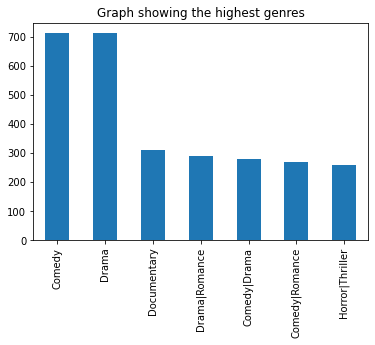

In [36]:
function('genres', 'bar')
plt.title('Graph showing the highest genres')

Here is another onteresting graph which shows a picture of the highest genres recorded. Comedy and Drama topping the table with 712 counts each while the least is Horror|Thriller with 259.

Showing the relationship between Budget and Revenue

Text(0.5, 0.98, 'Correlation between Budget and Revenue')

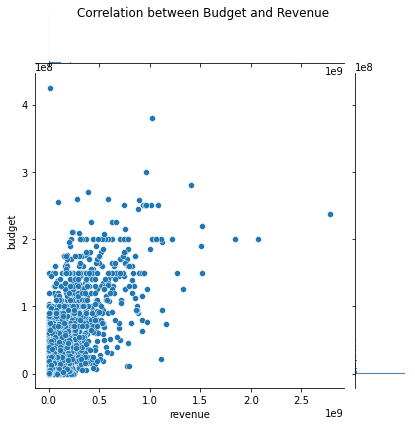

In [37]:
df=sns.jointplot(data=df_tmdb, x = 'revenue', y = 'budget')
df.fig.suptitle("Correlation between Budget and Revenue")

The image above shows the correlation between the revenue and budget.

<a id='conclusions'></a>
## Conclusions

Investigating a data set using a tmbd movie data which include different informations ranging from the producer to the genres of the movie.
Having gather the data, i cleaned the data by removing the null in the dataset, and also dropped some coulums that are not needed.
The next step was the exploratory data analysis. This approach analyze the dataset to summarized the main characteristics which are usually in visual form as seen above.

Having analysed and explored the dataset given in tmdb, i observed that the movie with the highest popularity is Jurassic World	with the population of 32.985763, followed by Mad Max: Fury Road (28.419936), Interstellar (24.949134), Guardians of the Galaxy	(14.311205), Insurgent	(13.112507).

Secondly, the movie that geerated the highest revenue is Avatar (2781505847, second was Star Wars: The Force Awakens (2068178225), then we have Titanic (1845034188),The Avengers (1519557910), Jurassic World (1513528810)

From question three(3), the movie with the longest runtime is The Story of Film: An Odyssey	with the runtime of 900, while the director with the highest movie is Woody Allen with 45 movies, Clint Eastwood with 34, Steven Spielberg with  29.

Furthermore, i was able to draw the bar chat for the first 7 directors. This also goes with the highest genres. It was observed that comedy and drama recoreded the highest with 712 count while the least was horror/thriller with 259 counts.

Finally, one major limitation I encountered was in the genres. This is because the genres column shows different types of genres but seperated by a pipe symbol. This need to be formatted next to avoid complication.

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295